## [Issues]
0. Data 가져오기
1. ID, Name and SSN (Not useful)
2. Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt Credit_Mix, Monthly_Balance Numerical but show as catogery (need to be fixed)
3. Occupation, CreditMix has value "__"
4. Data contains outliers
5. Num_Credit_Card has zeros
6. Type_of_Loan Need to rewrite as 8 columns
7. Num_Bank_Accounts contains negative values
8. Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,'Credit_Mix' (needs Feature Engineering)
9. Target Columns is Imbalanced
10. A lot of missing data

# 0. 데이터 import

In [1]:
# Packages for EDA 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import category_encoders as ce
import re 

# Modeling and evaluation 
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report 
# import joblib # 파이프제작 파이프라인

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

import warnings 
warnings.filterwarnings("ignore")

/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
/Users/kyle/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import pandas as pd
import numpy as np

In [ ]:
# from google.colab import drive # 드라이브에서 파일 가져오는 방식
# drive.mount("/content/drive")

# filename = "/content/drive/MyDrive/해커톤/Preprocessed_final_Data.csv"
# df = pd.read_csv(filename)
# df = df.drop(['Monthly_Inhand_Salary', 'Credit_Utilization_Ratio', 'Num_Credit_Card', 'Credit_Mix', 'Num_Bank_Accounts', 'Age', 'Monthly_Balance', 'Num_of_Delayed_Payment', 'Interest_Rate', 'Credit_History_Age', 'Num_Credit_Inquiries'], axis=1)
# df.head()

In [3]:
df = pd.read_csv('./csv//Preprocessed_final_Data.csv', index_col=0)
# df.drop("Unnamed: 0", inplace=True, axis=1) # index_col은 0!
df.head(3)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,1,0,0,0,0,1,0,0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,...,0,1,0,0,0,0,0,1,0,0
2,33.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,6.27,...,0,1,0,0,0,0,0,0,1,0


In [4]:
Loan_list = ['Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan']
Month_list=['Month_August','Month_February','Month_January','Month_July','Month_June','Month_March','Month_May']
PB_list = ['Payment_Behaviour_High_spent_Medium_value_payments', 'Payment_Behaviour_High_spent_Small_value_payments', 'Payment_Behaviour_Low_spent_Large_value_payments', 'Payment_Behaviour_Low_spent_Medium_value_payments', 'Payment_Behaviour_Low_spent_Small_value_payments']
OC_list = ['Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer']

df = df.drop(OC_list, axis=1)
df = df.drop(PB_list, axis=1)
df = df.drop(Loan_list, axis=1)
df = df.drop(Month_list, axis=1)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.311110,10.618880,14.000000,25.000000,33.000000,41.000000,56.000000
Annual_Income,100000.0,48046.898523,34706.155065,7005.930000,19457.500000,37578.610000,68655.405000,152574.760000
Monthly_Inhand_Salary,100000.0,3983.576117,2875.553530,303.645417,1626.594167,3096.836667,5712.553333,12461.296667
Num_Bank_Accounts,100000.0,5.413080,2.508894,1.000000,3.000000,5.000000,7.000000,18.000000
Num_Credit_Card,100000.0,5.534440,2.068496,1.000000,4.000000,5.000000,7.000000,18.000000
Interest_Rate,100000.0,14.531440,8.739453,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,-0.507070,20.191464,-100.000000,1.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,19.415900,12.638937,-5.000000,10.000000,18.000000,26.000000,55.000000
Num_of_Delayed_Payment,100000.0,13.320820,6.289298,-3.000000,9.000000,14.000000,18.000000,28.000000
Changed_Credit_Limit,100000.0,10.241045,6.575751,-6.490000,5.320000,9.400000,14.600000,29.160000


- 주제선정 배경, 이유
- 분석프로세스 따라서 순차진행
    - 피쳐 셀렉트 후 컬럼이 줄면 수치형 컬럼을 대상으로 고객별(group by) 컬럼을 만들어 분석해보거나((파이썬 실무 테크닉 P.79)
- 도메인적 분석
    - 라벨(0~3)을 클러스터링해서 2차원으로 plot한 뒤에 그룹 별로 어떤 경향을 가지고 있는지 봐야할 것 같음.(파이썬 실무 테크닉 P.89)

In [6]:
## 고객 경향확인해보기
# not_delayed_customer = df.loc[df["Delay_from_due_date"]==0]
# not_delayed_customer.head(10)
# delayed_customer = df.loc[df["Delay_from_due_date"]==1]
# delayed_customer.head(10)

## 1. y전처리

In [8]:
# df.columns
target= 'Delay_from_due_date'
y = df[target] # 종속변인 추출
X = df.drop(target, axis=1) # 종속변인+중복컬럼 제외

### 선정할 변수 여기서

In [9]:
# 1. VIF로 다중공선성 높은 변수순서로 제거 -> 망함
# X = df.drop(['Monthly_Inhand_Salary', 'Credit_Utilization_Ratio', 'Num_Credit_Card', 'Credit_Mix', 'Num_Bank_Accounts', 'Age', 'Monthly_Balance', 'Num_of_Delayed_Payment', 'Interest_Rate', 'Credit_History_Age', 'Num_Credit_Inquiries'], axis=1)

# 2 . 도메인적 feature 선정(필수컬럼)
# X = df[['Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Score', 'Payment_of_Min_Amount_Yes', 'Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan']]
# 신용카드수, 신용카드이자율, 대출수, 대출유형, 평균 연체일, 체불횟수, 신용카드 한도 변경율, 신용조회수, 신용점수, 최소금 지불여부, 체불액

# 3. F-I로 컬럼 4개 지우기 + 도메인적 feautre선정 + VIF로 다중공선성 높은 변수 제거
selected_feature = ["Interest_Rate", "Num_Bank_Accounts", "Credit_History_Age", "Num_of_Delayed_Payment", "Outstanding_Debt", "Num_Credit_Inquiries", "Annual_Income", "Total_EMI_per_month", "Changed_Credit_Limit", "Num_of_Loan", "Amount_invested_monthly", "Credit_Score", "Payment_of_Min_Amount_Yes"]
X = df[selected_feature]

- 0이하 : 0
- 1~5 : 1
- 6~30 : 2
- 31~90 : 3

In [10]:
for i in range(len(y)):
    if y[i] <= 0 :
        y[i] = 0
    elif y[i] <= 5:
        y[i] = 1
    elif y[i] <= 30:
        y[i] = 2
    elif y[i] <= 90:
        y[i] = 3
    else:
        pass

In [11]:
y = y.astype("int")
y.value_counts()

2    73990
3    15106
1     9118
0     1786
Name: Delay_from_due_date, dtype: int64

oversampling

In [ ]:
# 오버샘플링
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

In [ ]:
# # 언더샘플링
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=156)
# X_data_rus, y_data_rus = rus.fit_resample(X, y)

In [13]:
y_data_rus.value_counts(normalize=True)

1    0.25
0    0.25
2    0.25
3    0.25
Name: Delay_from_due_date, dtype: float64

In [14]:
y.value_counts()

2    73990
3    15106
1     9118
0     1786
Name: Delay_from_due_date, dtype: int64

In [15]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)

In [16]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

## 2. 피쳐선정

### VIF

히트맵

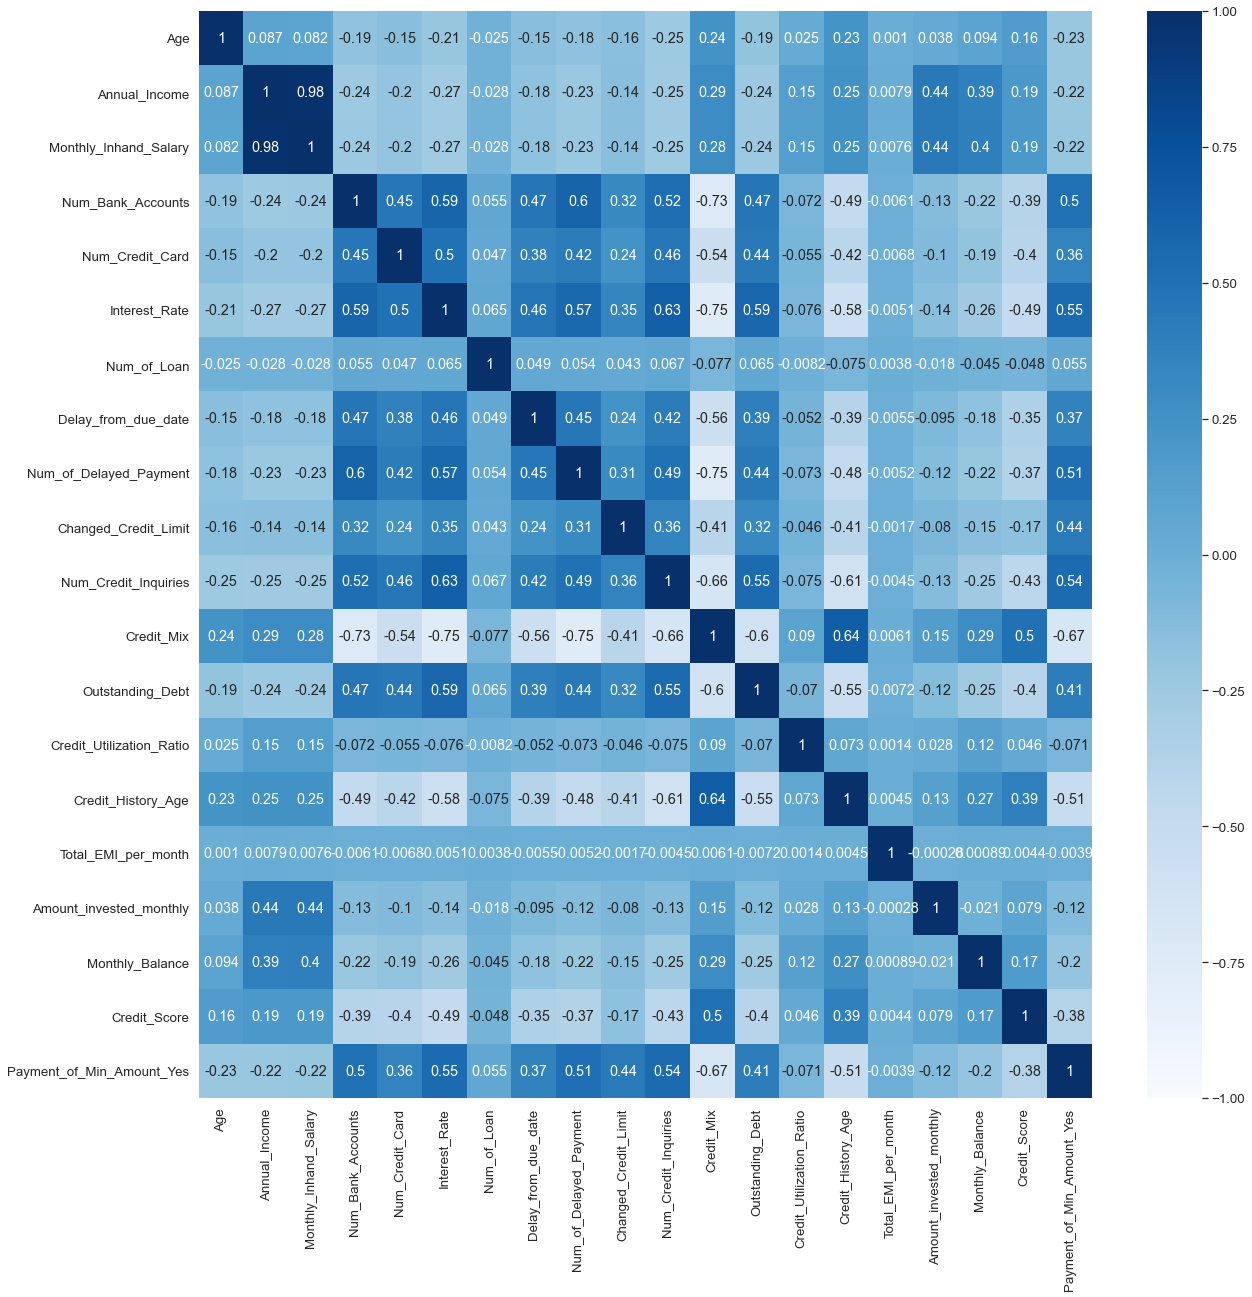

In [105]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.show()

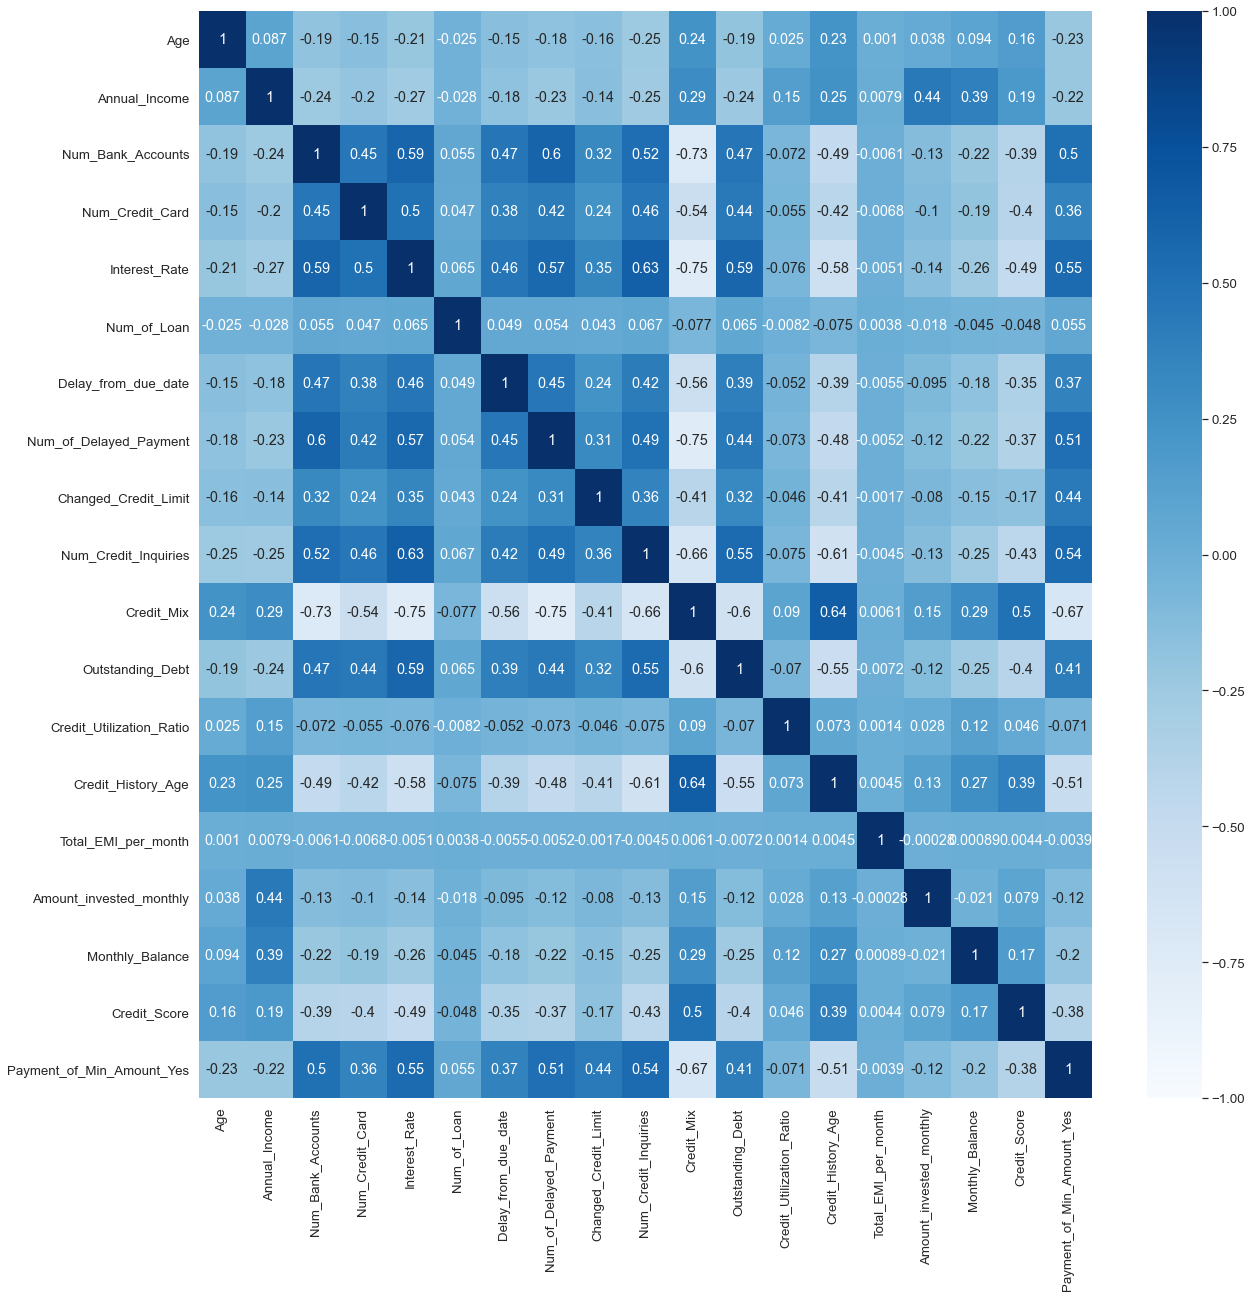

In [106]:
df_copy = df
df_copy.drop("Monthly_Inhand_Salary", inplace=True, axis=1)
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.show()

VIF확인

In [80]:
df_copy = df
df_copy.drop("Delay_from_due_date",inplace=True, axis=1)

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame(
    [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])],
    index=df_copy.columns, columns=['VIF'])
vif.sort_values(by='VIF', ascending=False)

,VIF
Monthly_Inhand_Salary,74.428462
Annual_Income,73.557032
Credit_Utilization_Ratio,32.155081
Credit_Mix,11.760516
Num_Credit_Card,11.686076
Num_Bank_Accounts,11.386123
Num_of_Delayed_Payment,11.305160
Credit_History_Age,11.242237
Age,10.971391
Monthly_Balance,10.454579


In [82]:
df_copy.drop("Monthly_Inhand_Salary",inplace=True, axis=1)

vif = pd.DataFrame(
    [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])],
    index=df_copy.columns, columns=['VIF'])
vif.sort_values(by='VIF', ascending=False)

,VIF
Credit_Utilization_Ratio,32.155062
Credit_Mix,11.756320
Num_Credit_Card,11.684129
Num_Bank_Accounts,11.384932
Num_of_Delayed_Payment,11.305150
Credit_History_Age,11.241852
Age,10.965877
Monthly_Balance,10.352149
Interest_Rate,9.529449
Num_Credit_Inquiries,6.980998


In [83]:
df_copy.drop("Credit_Utilization_Ratio",inplace=True, axis=1)

vif = pd.DataFrame(
    [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])],
    index=df_copy.columns, columns=['VIF'])
vif.sort_values(by='VIF', ascending=False)

,VIF
Num_Credit_Card,11.415168
Num_Bank_Accounts,11.100993
Credit_History_Age,10.931005
Num_of_Delayed_Payment,10.857635
Age,10.719242
Monthly_Balance,10.071362
Credit_Mix,9.990004
Interest_Rate,9.341906
Num_Credit_Inquiries,6.909824
Outstanding_Debt,5.279243


In [84]:
df_copy.drop("Num_Credit_Card",inplace=True, axis=1)

vif = pd.DataFrame(
    [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])],
    index=df_copy.columns, columns=['VIF'])
vif.sort_values(by='VIF', ascending=False)

,VIF
Credit_History_Age,10.860204
Num_Bank_Accounts,10.761010
Num_of_Delayed_Payment,10.600825
Age,10.593996
Monthly_Balance,10.029939
Credit_Mix,9.885961
Interest_Rate,9.062533
Num_Credit_Inquiries,6.756751
Outstanding_Debt,5.145028
Annual_Income,4.624304


In [85]:
df_copy.drop("Credit_History_Age",inplace=True, axis=1)

vif = pd.DataFrame(
    [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])],
    index=df_copy.columns, columns=['VIF'])
vif.sort_values(by='VIF', ascending=False)

,VIF
Num_Bank_Accounts,10.574263
Num_of_Delayed_Payment,10.289831
Age,10.261517
Monthly_Balance,9.776826
Interest_Rate,9.036016
Credit_Mix,7.488118
Num_Credit_Inquiries,6.627095
Outstanding_Debt,5.094963
Annual_Income,4.623800
Changed_Credit_Limit,4.427438


In [86]:
df_copy.drop("Num_Bank_Accounts",inplace=True, axis=1)

vif = pd.DataFrame(
    [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])],
    index=df_copy.columns, columns=['VIF'])
vif.sort_values(by='VIF', ascending=False)

,VIF
Age,10.041375
Monthly_Balance,9.646219
Num_of_Delayed_Payment,9.116078
Interest_Rate,8.675811
Credit_Mix,7.428913
Num_Credit_Inquiries,6.523067
Outstanding_Debt,5.045219
Annual_Income,4.620937
Changed_Credit_Limit,4.407774
Payment_of_Min_Amount_Yes,3.979349


In [87]:
df_copy.drop("Age",inplace=True, axis=1)

vif = pd.DataFrame(
    [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])],
    index=df_copy.columns, columns=['VIF'])
vif.sort_values(by='VIF', ascending=False)

,VIF
Monthly_Balance,9.441445
Num_of_Delayed_Payment,8.500639
Interest_Rate,8.481247
Num_Credit_Inquiries,6.523043
Credit_Mix,5.969182
Outstanding_Debt,5.021666
Annual_Income,4.620935
Changed_Credit_Limit,4.405858
Payment_of_Min_Amount_Yes,3.977533
Credit_Score,3.718151


In [88]:
df_copy.drop("Monthly_Balance",inplace=True, axis=1)

vif = pd.DataFrame(
    [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])],
    index=df_copy.columns, columns=['VIF'])
vif.sort_values(by='VIF', ascending=False)

,VIF
Interest_Rate,8.339203
Num_of_Delayed_Payment,7.959116
Num_Credit_Inquiries,6.517304
Outstanding_Debt,5.020474
Changed_Credit_Limit,4.402055
Credit_Mix,4.329130
Payment_of_Min_Amount_Yes,3.948040
Annual_Income,3.825998
Credit_Score,3.701186
Amount_invested_monthly,3.569250


In [89]:
df_copy.drop("Interest_Rate",inplace=True, axis=1)

vif = pd.DataFrame(
    [variance_inflation_factor(df_copy.values, i) for i in range(df_copy.shape[1])],
    index=df_copy.columns, columns=['VIF'])
vif.sort_values(by='VIF', ascending=False)

,VIF
Num_of_Delayed_Payment,6.987145
Num_Credit_Inquiries,5.931453
Outstanding_Debt,4.571318
Changed_Credit_Limit,4.367811
Credit_Mix,4.327048
Payment_of_Min_Amount_Yes,3.868605
Annual_Income,3.823020
Credit_Score,3.691436
Amount_invested_monthly,3.564532
Total_EMI_per_month,1.028142


** VIF제거하면서 정확도 확인하는 코드!!

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(C=1.0, solver='lbfgs', max_iter=100, n_jobs=None)

def get_clf_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test, pred)
    print("accuracy:", accuracy)
    df_ac = pd.DataFrame({'VIF': [accuracy]})
    df_ac.index = ["Accuracy"]
    return df_ac

df_copy = df
drop_column = []
target = "Delay_from_due_date"
drop_list = [target]
drop_list.extend(drop_column)
y = df_copy[target]
X = df_copy.drop(drop_list, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)
pred_proba = model_lr.predict_proba(X_test)[:, 1]


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns, columns=['VIF'])
vif = pd.concat([vif, get_clf_eval(y_test, pred, pred_proba)], axis=0)

vif.sort_values(by='VIF', ascending=False)

### PermutationImportance

In [ ]:
import xgboost
from xgboost import XGBClassifier
from sklearn import metrics
xgb = XGBClassifier(random_state=0, n_estimators=300).fit(X_train, y_train)

print('train accuracy: ', metrics.accuracy_score(y_train, xgb.predict(X_train)))
print('test accuracy: ', metrics.accuracy_score(y_test, xgb.predict(X_test)))

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance 
from sklearn.ensemble import RandomForestClassifier

# 미리 사용할 알고리즘을 fit 해야한다
# model = RandomForestClassifier().fit(X_train, y_train)

perm = PermutationImportance(xgb, scoring = "accuracy", random_state = 22).fit(X_test, y_test) 
eli5.show_weights(perm, top = 53, feature_names = X_test.columns.tolist())

## selectkbest

In [17]:
X_train

array([[ 1.37972078,  0.86497373, -1.38990437, ..., -0.40715168,
        -1.34468234,  1.37520995],
       [-0.38436588,  0.22923139, -0.06770112, ...,  0.27058752,
         0.19670588, -0.7271617 ],
       [ 1.31416682,  0.5598491 , -0.95639447, ..., -0.05869536,
        -1.34468234,  1.37520995],
       ...,
       [-0.38436588, -1.00875357,  1.43228233, ..., -0.10490541,
         0.19670588, -0.7271617 ],
       [ 0.535474  ,  0.86497373, -1.23958985, ..., -0.83514179,
        -1.34468234,  1.37520995],
       [ 0.535474  , -0.13388699, -0.87487493, ..., -0.29451151,
         0.19670588,  1.37520995]])

In [18]:
y_train

288281    3
109063    0
294652    3
229363    1
11512     2
         ..
51455     2
260444    3
190235    1
244587    3
33135     2
Name: Delay_from_due_date, Length: 207172, dtype: int64

In [19]:
"""변수 중요도"""
from sklearn.feature_selection import SelectKBest, f_regression, chi2
bestfeatures = SelectKBest(score_func=chi2, k=all)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(53,'Score'))  #print 30 best features

TypeError: '<=' not supported between instances of 'int' and 'builtin_function_or_method'

# Model

In [47]:
# bagging = BaggingClassifier(n_jobs=-1)
# extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
# randomForest = RandomForestClassifier(n_jobs=-1)
# histGradientBoosting = HistGradientBoostingClassifier()
# XGB = XGBClassifier(n_jobs=-1)

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

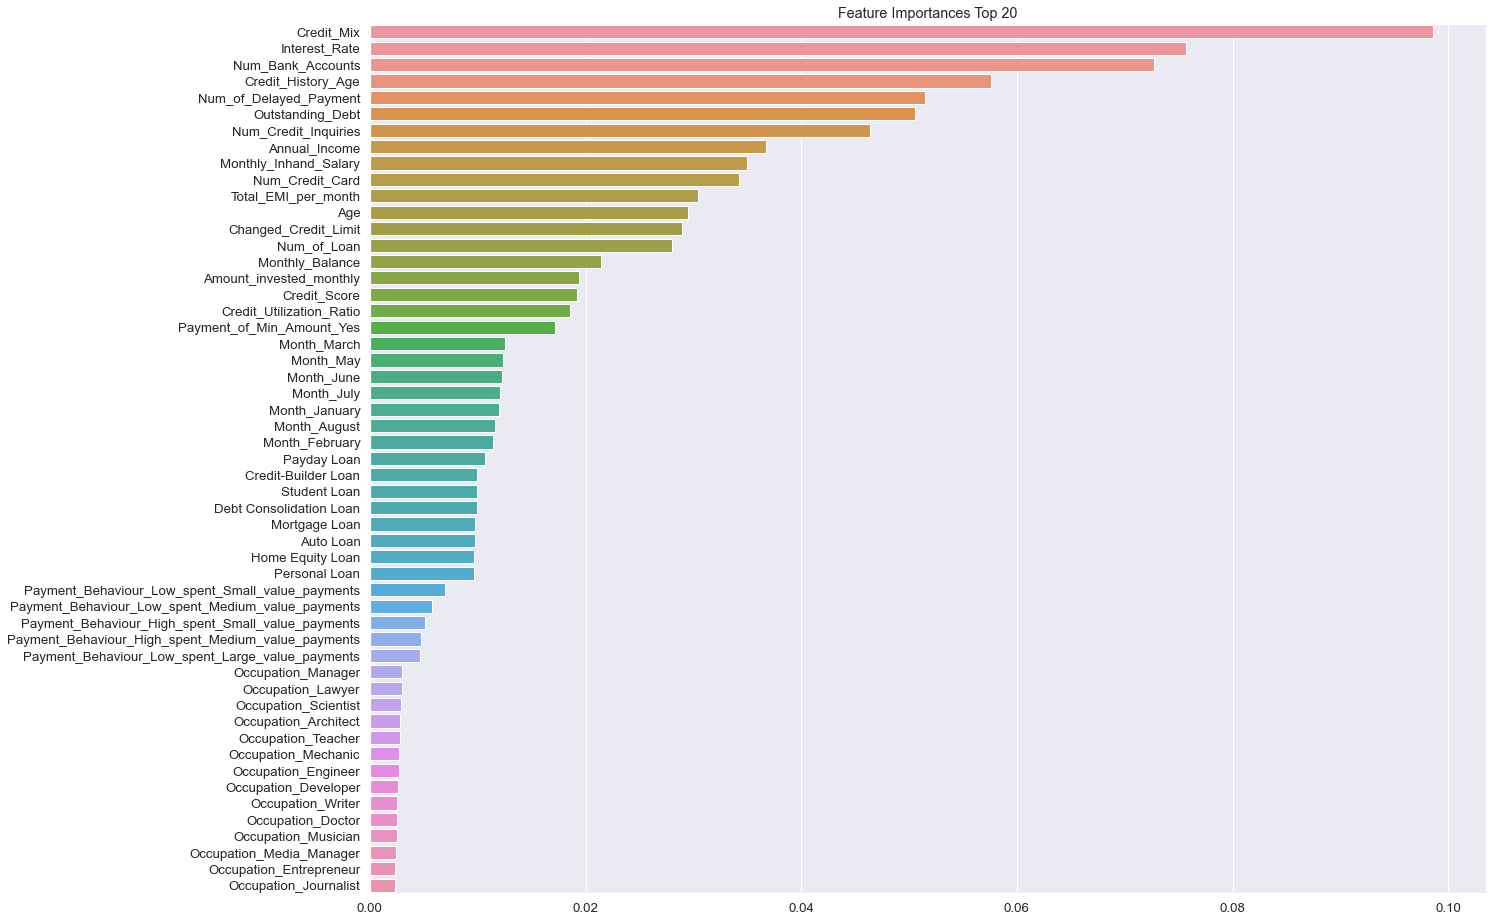

In [48]:
#feature 중요도도 그려볼 수 있다. 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_non_label = df
del df_non_label["Delay_from_due_date"]
# df_non_label.columns

feature_importances_values = model.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=df_non_label.columns)
feature_importances_top20 = feature_importances.sort_values(ascending=False)[:53] #중요한 순서로 정렬 후 top 20개만 뽑아 시각화

plt.figure(figsize=(20, 16))
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_importances_top20, y=feature_importances_top20.index)
plt.show()

---
# Score
1 ) 피쳐셀렉션 없을 때 score

![image](https://user-images.githubusercontent.com/88031549/197193928-c14d4e41-a683-4e05-9da4-c0b91d8e689b.png)

2 ) VIF로 다중공선성 높은 피쳐 11개 제외했을 때.  
![image](https://user-images.githubusercontent.com/88031549/197198745-4eb51127-fc9c-4836-84ae-5bb8e881a8d6.png)

3 ) 도메인지식으로만 피쳐 선정했을 때.  
![도메인으로만 피쳐셀렉](https://user-images.githubusercontent.com/88031549/197527384-3fed5474-901c-40d2-b926-fa2f4a60692a.png)


4 ) Feature Importance로 하위중요변수 2개 제외(지출행동, 직업)  
<img width="369" alt="변수2개 삭제하고 oversample한거" src="https://user-images.githubusercontent.com/88031549/197528767-df089c69-db20-4cfa-861a-22c2319ca95f.png">


5 ) Feature Importance로 하위중요변수 4개 제외(지출행동, 직업, 월, 대출종류)  
![FeatureImportance 결과I로 변수4개 제외했을 떄](https://user-images.githubusercontent.com/88031549/197528839-adb6acf1-e54e-4609-82e9-16de3a3728f0.png)


6 ) 최종피쳐 선정방법: FI로 하위중요변수 4개 제외 + 도메인지식으로 선정한 피쳐 + VIF로 다중공선성 높은 변수 제외(5개)  
최종피쳐 갯수 : 13개  
![최종피쳐셀렉](https://user-images.githubusercontent.com/88031549/197528889-bfac4bc0-e708-4c86-96ad-423db52fea35.png)


7 ) 최종 후보 모델 4개 결과  
<img width="859" alt="image" src="https://user-images.githubusercontent.com/88031549/197695235-277f8a21-6cc6-4028-a6b3-e9bec3de27eb.png">


피쳐선정.  
빨강: 도메인.  
파랑: VIF.  
아래 4개 : feature importance.  
![feature_importance 2](https://user-images.githubusercontent.com/88031549/197529003-daddcde1-9911-4e95-a57e-017a6ead77d9.png)


# 분석

## shap value

In [142]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
# shap
import shap
#각 변수 별로, 값이 증가함에 따라 파산의 확률변화를 볼 수 있다.
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap_values = np.array(shap_values)
X_test = pd.DataFrame(X_test)

shap.initjs() #자바 스크립트 초기화(그래프 초기화)
shap.force_plot(explainer.expected_value[0], shap_values[1], X_test) #<= shap_value 괄호 안의 숫자 0,1이 target을 의미

In [ ]:
#모든변수 한 번에!
shap.summary_plot(shap_values[1], X_test)

In [ ]:
# 모든변수 한 번에(bar로)
shap.summary_plot(shap_values[1], X_test, plot_type = "bar")

In [ ]:
# "지정변수"와 가장 관련이 큰 변수를 오른쪽에 보여줌
# EPS가 낮을 때 해당 변수에 높은 영향력을 보임
# shap.dependence_plot(' Persistent EPS in the Last Four Seasons', shap_values[1], X_test)
shap.dependence_plot(' Persistent EPS in the Last Four Seasons', shap_values, X_test)